<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
df_product = pd.read_csv('/content/drive/MyDrive/AI ML Great Learning/Stats NLP/product_data.csv')
df_review = pd.read_csv('/content/drive/MyDrive/AI ML Great Learning/Stats NLP/reviews.csv')

In [5]:
df_product.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
561,B07Q2X19LG,HUAWEI,"Huawei P30 128GB+6GB RAM (ELE-L29) 6.1"" LTE Fa...",https://www.amazon.com/ELE-L29-Factory-Unlocke...,https://m.media-amazon.com/images/I/61jJeZBliW...,4.5000000,https://www.amazon.com/product-reviews/B07Q2X19LG,115,513.9900000,749.9900000
84,B00PLBFPAS,Nokia,"Nokia Lumia 630 Windows Prepaid SmartPhone, Ca...",https://www.amazon.com/Nokia-Windows-SmartPhon...,https://m.media-amazon.com/images/I/51wHAncQp5...,3.3000000,https://www.amazon.com/product-reviews/B00PLBFPAS,14,129.9900000,0.0000000
344,B078YXQ38Z,Samsung,Samsung Galaxy S8 Active 64GB SM-G892A Unlocke...,https://www.amazon.com/Samsung-Galaxy-S8-Activ...,https://m.media-amazon.com/images/I/61wgvFSAJQ...,3.9000000,https://www.amazon.com/product-reviews/B078YXQ38Z,185,274.9500000,0.0000000
294,B075ZGJMQY,Samsung,Samsung Galaxy Note 8 64GB Unlocked GSM LTE An...,https://www.amazon.com/Samsung-Galaxy-Unlocked...,https://m.media-amazon.com/images/I/71wjfOWQhs...,3.7000000,https://www.amazon.com/product-reviews/B075ZGJMQY,104,407.9900000,0.0000000


In [ ]:
df_product.shape

(720, 10)

In [ ]:
df_review.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
35476,B071JP8XDJ,Jonathan,5,"December 4, 2018",True,Info please,The phone is quite nice. A good upgrade from m...,nan
16543,B00X2ZQ5RM,Veronica Stroh,5,"November 20, 2017",True,"Works great, came in perfect condition","Works great, came in perfect condition. I've b...",1.0000000
9641,B00HPP3QD6,ryan fayette,5,"February 13, 2015",True,very satisfied,Very pleased. Just as described,nan
12445,B00MWI4KKE,"""musicmakerscott""",4,"July 29, 2018",True,good sound quality plenty of internal storage ...,"This phone performs well for what it is, good ...",nan
39553,B075FLG6MV,Amazon Customer,5,"April 11, 2018",True,Amazing budget smartphone with timely system u...,Amazing budget smartphone with timely system u...,1.0000000


In [ ]:
df_review.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [6]:
df_product.drop(['url', 'image','reviewUrl'], axis = 1, inplace=True)
df_product.head(5)

,asin,brand,title,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7000000,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3000000,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,3.1000000,12,149.9900000,0.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
df_product.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


In [ ]:
df_product.describe(include='O')

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B07QQYHSR5,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,346,2


In [ ]:
df_review.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [ ]:
df_review.describe(include='O')

,asin,title,body
count,67986,67972,67965
unique,720,41489,59811
top,B00F2SKPIM,Five Stars,Good
freq,981,6043,303


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

- Most of the people have given 5 star ratings.
- We have 720 products in file.
- Apple is the top title with frequency 2. Total unituw brand are 712.
- Samsung is the top brand. We have 10 unique brand.
- Rating is in the range 1 to 5. 25% people rated 3, 50% and 75% people rated 5. Mean rating is 3.7
- As we have more records with rating 5 our dataset is biased.
- OriginalPrice is zero for all the records.
- Price ranges from 0 to 999.99 with 235 as mean price value


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

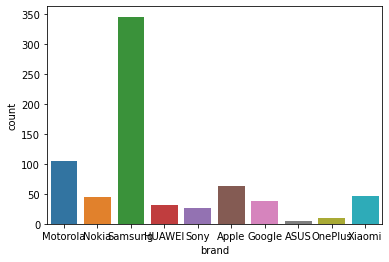

In [ ]:
sns.countplot(df_product.brand);

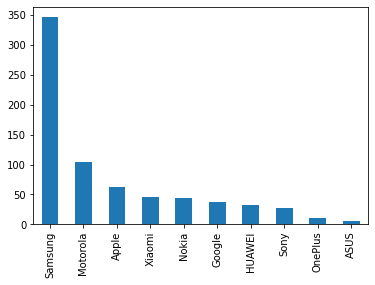

In [ ]:
df_product.brand.value_counts().plot(kind='bar')

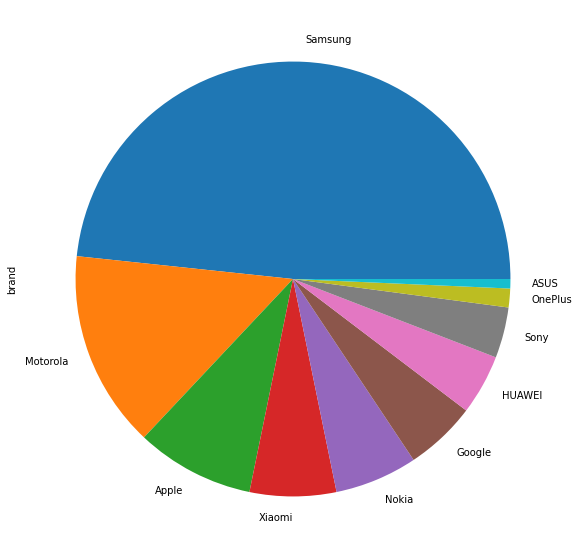

In [ ]:
df_product.brand.value_counts().plot(kind='pie', figsize = (15,10));

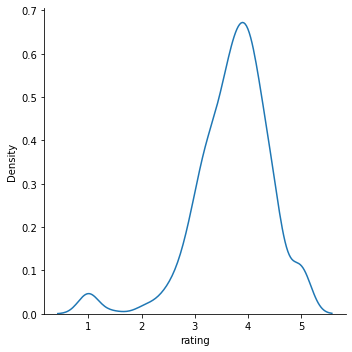

In [ ]:
sns.displot(df_product['rating'], kind='kde');

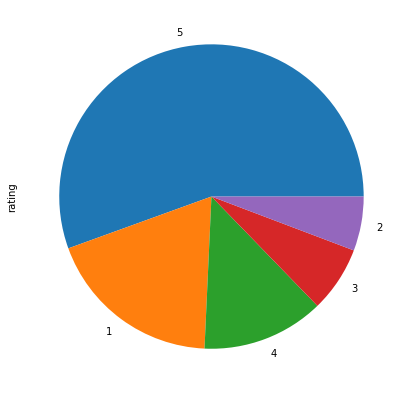

In [ ]:
df_review['rating'].value_counts().plot(kind='pie', figsize = (7,7));

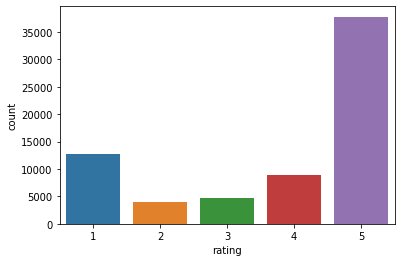

In [ ]:
sns.countplot(df_review['rating']);

Most of the product are of Samsumg brand. Most of the rating user gave is 5.

### 4.5 Display average rating per brand

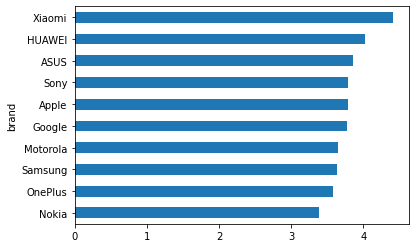

In [ ]:
df_product.groupby(by='brand')['rating'].mean().sort_values().plot(kind='barh');

Xiomi is leading brand. It has high average rating.

### 4.6 Display average price per brand

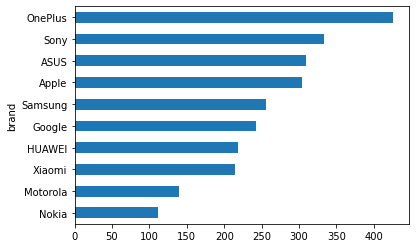

In [ ]:
df_product.groupby(by='brand')['price'].mean().sort_values().plot(kind='barh');

Oneplus brand has most average plan

### 4.7 Display average 'totalReviews' per brand

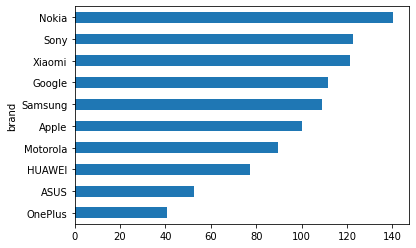

In [ ]:
df_product.groupby(by='brand')['totalReviews'].mean().sort_values().plot(kind='barh');

Nokia has highest total review.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [7]:
# df_final = pd.merge(df_review, df_product, on='asin')

# To get all the reviews even if product is not there we will use left join.
df_final = pd.merge(df_review, df_product, how='left', on='asin')

In [8]:
df_final.shape

(67986, 14)

In [ ]:
df_final.sample(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
37137,B072N3GKSM,Rosey,1,"August 21, 2018",False,CAUTION: Refurbished units probably aren't bei...,I have a Pixel 2 XL. My son was ecstatic to ge...,1.0000000,Google,"Google Pixel GSM Unlocked (Renewed) (32GB, Gray)",2.9000000,319,109.9500000,0.0000000
47374,B07CHW5KMY,amarisrama,4,"September 29, 2018",True,budget phone..,some of the basic features are disabled by Mot...,11.0000000,Motorola,"Motorola Moto G6 (32GB, 3GB RAM) Dual SIM 5.7""...",3.8000000,212,118.9600000,118.9700000
45481,B079HB518K,Pamela S. Nichols,5,"September 19, 2019",True,Reliability,Replaced an IPhone 6SE belonging to my grandda...,nan,Apple,"Apple iPhone 7, 32GB, Rose Gold - For AT&T / T...",3.9000000,243,199.0000000,206.9000000
57231,B07NP2Y82Q,BioDoug,1,"June 10, 2019",True,Great if you don't need wifi calling,Phone does not support wifi calling in the USA...,5.0000000,Motorola,"Motorola Moto G7+ Plus (64GB, 4GB RAM) Dual SI...",4.1000000,125,202.9900000,0.0000000
49874,B07FZH9BGV,Kiluwasha,5,"February 15, 2019",True,Great product for the money,I wanted to invest my money into something ths...,nan,Samsung,Samsung Galaxy Note 9 Factory Unlocked Phone w...,4.1000000,873,781.0500000,999.9900000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [9]:
df_final.rename(columns = {'title_x': 'review_title', 'rating_x':'user_rating', 'title_y' : 'item_title', 'rating_y': 'overall_rating'}, inplace=True)

In [10]:
df_final.sample(3)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
11907,B00LAEA84S,Steven,1,"September 21, 2017",True,Do not buy.,Phone is junk. Stopped charging correctly afte...,nan,Samsung,Samsung Galaxy S5 G900V Verizon 4G LTE Smartph...,3.2000000,627,0.0000000,0.0000000
42594,B077578W38,Mike G,5,"December 7, 2019",False,Really great condition,It was as advertised where the phone was like ...,nan,Apple,"Apple iPhone X, Unlocked 5.8"", 64GB - Space Gr...",3.9000000,442,448.9500000,0.0000000
15810,B00VH2TWBS,K3R,1,"May 15, 2018",True,No service..,Phone is said to be fully unlocked but I have ...,1.0000000,Samsung,Samsung GALAXY S6 G920 32GB Unlocked GSM 4G LT...,3.1000000,243,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [11]:
df_1 = df_final[df_final.verified == True]

In [12]:
df_1.shape

(61225, 14)

In [13]:
# Confirming the count in df_1
df_final.verified.value_counts()

True     61225
False     6761
Name: verified, dtype: int64

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

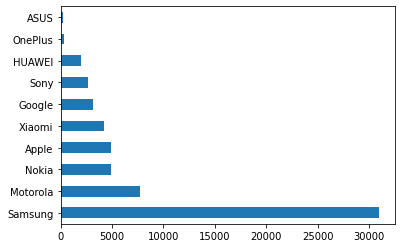

In [14]:
df_1.brand.value_counts().plot(kind='barh');

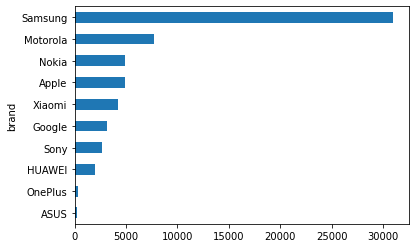

In [15]:
df_1.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh');

Brand Samsung has most reviews.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [16]:
# Building final data frame
df_final = df_1[['brand','body','price','user_rating','review_title']]
df_final.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

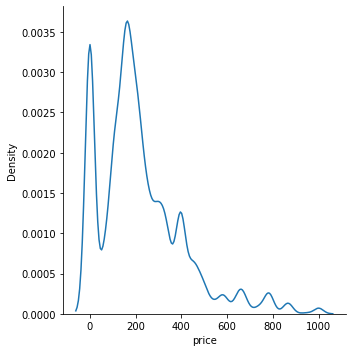

In [17]:
sns.displot(df_final['price'], kind='kde');

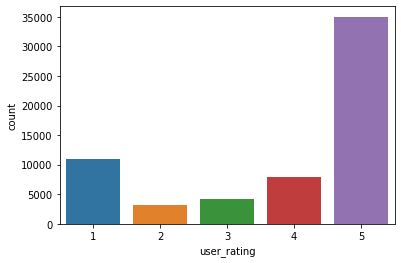

In [18]:
sns.countplot(df_final['user_rating']);

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [19]:
df_final['sentiment'] = df_final['user_rating'].apply(lambda x: 1 if x > 3 else 0)

In [20]:
df_final['user_rating'].value_counts()

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

In [21]:
df_final['sentiment'].value_counts()

1    42939
0    18286
Name: sentiment, dtype: int64

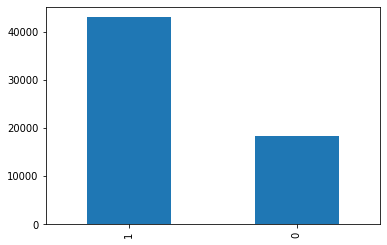

In [22]:
df_final['sentiment'].value_counts().plot(kind='bar');

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

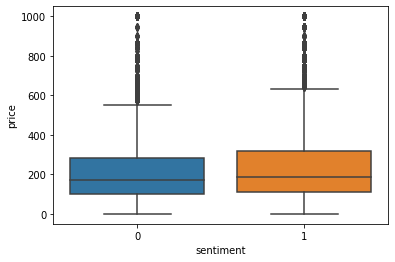

In [23]:
sns.boxplot(x=df_final['sentiment'], y=df_final['price']);

Price has no relation with sentiments. Both boxplot are aligned on same lines.

In [24]:
pd.crosstab(df_final['brand'], df_final['sentiment'])

sentiment,0,1
brand,,
ASUS,69,137
Apple,1627,3249
Google,1011,2152
HUAWEI,366,1653
Motorola,2220,5494
Nokia,1904,2974
OnePlus,45,259
Samsung,9499,21521
Sony,879,1812


In [25]:
pd.crosstab(df_final['brand'], df_final['sentiment']).apply(lambda r: r/r.sum(), axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


- For ASUS 33% review are negative and 66% reviews are positive.
- Similarly Samsung has 30% negative and 70% positive reviews.
- Xiami and Oneplus has huge positive reviews.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [26]:
# Creating a new column keyword for our text processing
# Lowering the case
df_final['keyword'] = df_final['body'].str.lower()

In [27]:
df_final['keyword'].sample(2)

53251    could not get it to work. had to return the ph...
46220    the phone wouldn't even turn on !! and was tra...
Name: keyword, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [28]:
df_final['keyword'].head(10)

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
23    the phone did not come with a charger and didn...
24                   served me well as a back up phone.
25    i got this phone just as secondary cell phone....
26    sturdy - clarity is great - easy to use only p...
27                                 phone stoped working
Name: keyword, dtype: object

In [29]:
df_final['keyword'] = df_final['keyword'].str.replace('[^\w\s]','')

In [30]:
df_final['keyword'].head(10)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
23    the phone did not come with a charger and didn...
24                    served me well as a back up phone
25    i got this phone just as secondary cell phone ...
26    sturdy  clarity is great  easy to use only pro...
27                                 phone stoped working
Name: keyword, dtype: object

It has removed ' from don't, and '&' from at&t

In [ ]:
# Another way
# import string
# df_final['keywords'] = df_final['keywords'].str.translate(str.maketrans('', '', string.punctuation))

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [33]:
df_final['keyword'] = df_final['keyword'].astype('str')

In [34]:
df_final['keyword'] = df_final['keyword'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_words))

In [36]:
df_final['keyword'].head()

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: keyword, dtype: object

Stop words removed

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [39]:
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [40]:
# Copying for backup
df_final1 = df_final.copy()

In [41]:
df_final['lemm'] = df_final['keyword'].apply(lemmatize_text)
df_final['lemm'].head(5)

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [42]:
# Most common word
from collections import Counter
cnt = Counter()
for text in df_final["keyword"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [43]:
# Most rare word
cnt.most_common()[:-10-1:-1]

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1),
 ('4ever', 1)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [47]:
tfidf = tfidf_vectorizer.fit_transform(df_final['keyword']) # We are passing keyword only as column 'lemm' is list

In [67]:
tfidf.shape

(61225, 38370)

In [48]:
# Checking vocabulary to get all the words
tfidf_vectorizer.vocabulary_

{'dont': 11596,
 'buy': 6837,
 'service': 30416,
 'star': 32286,
 'phones': 25247,
 'locked': 20169,
 'pay': 24696,
 'additional': 3126,
 'fees': 14013,
 'unlock': 35572,
 'product': 26590,
 'good': 15670,
 'used': 35980,
 'cell': 7495,
 'phone': 25090,
 'one': 23673,
 'projects': 26692,
 'worked': 37663,
 'wonders': 37607,
 'definitely': 10365,
 'recommend': 27874,
 'anyone': 4149,
 'interested': 18330,
 'buying': 6851,
 'bought': 6330,
 'replace': 28492,
 'lg': 19787,
 'didnt': 10968,
 'like': 19934,
 'expected': 13374,
 'put': 27094,
 'old': 23603,
 'sim': 30937,
 'card': 7234,
 'new': 22652,
 'two': 35120,
 'serious': 30396,
 'drawbacks': 11753,
 'device': 10847,
 'related': 28268,
 'candy': 7156,
 'bar': 5288,
 'style': 32710,
 'first': 14251,
 'buttons': 6829,
 'exposed': 13483,
 'easy': 12112,
 'hit': 16916,
 'accidentally': 2875,
 'second': 30128,
 'screen': 29952,
 'easily': 12098,
 'scratched': 29901,
 'got': 15792,
 'making': 20665,
 'difficult': 11019,
 'read': 27564,
 'sun

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [50]:
y = df_final['sentiment']
X = tfidf

### 5.9 Split the data into Train & Test Sets

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 10, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier() # Using default values

# Training model
rf_clf.fit(x_train, y_train)

# Checking accuracy
print('Train Accuracy ', rf_clf.score(x_train, y_train))
print('Test Accuracy ', rf_clf.score(x_test, y_test))

Train Accuracy  0.9956833189443964
Test Accuracy  0.8896450348432056


Confusion Matrix on Train and Test

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = rf_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 4066,  1420],
       [  607, 12275]])

Checking confusion matrix on train also.

In [57]:
y_pred = rf_clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[12635,   165],
       [   20, 30037]])

## 7. Write your conclusion

- We can further improve the model performance. We have huge number of feature with this current approach we followed.
- We can perform hyper tuning TfidfVectorizer, use max_features to have less number of features. Currently we got huge number of features. Model will not learn well in this situation. We can also explore differnt ngram values.
- We do not have balance between the classes of rating. It would be good for any model if we do have equal number of records for both the classes else model will be biased towards majority class. We can remove Xiomi brand as it has high number of positive classes.
- Also we can remove words which are very rate, remove words which are very common.
- However we are still able to get 88% accruacy in test even withouth any preprocessing, this is a good accuracy although model is little overfit.

#### Trying model with few more hyper parameter and a different model.

In [64]:
tfidf_vectorizer = TfidfVectorizer( min_df = 2, ngram_range=(1,2), max_features = 2000 ) # Limiting features to 2000

X = tfidf_vectorizer.fit_transform(df_final['keyword'])
y = df_final['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 10, stratify=y, test_size=0.3)

rf_clf = RandomForestClassifier() # Using default values

# Training model
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# Checking accuracy
print('Train Accuracy ', rf_clf.score(x_train, y_train))
print('Test Accuracy ', rf_clf.score(x_test, y_test))

Train Accuracy  0.9923466411554706
Test Accuracy  0.8857251742160279


In [68]:
X.shape

(61225, 2000)

Accuracy not improved even after limiting the features to 2000. However we can say we are able to get same accuracy with quire less number of features now.

Earlier we were working on shape (61225, 38370), now we are working with (61225, 2000).

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models